# [Matplotlib](https://matplotlib.org) 

библиотека на языке программирования Python для визуализации данных

### [Возможности](https://matplotlib.org/gallery/index.html)

Matplotlib является гибким, легко конфигурируемым пакетом, который вместе с NumPy, SciPy и IPython предоставляет возможности, подобные MATLAB. В настоящее время пакет работает с несколькими графическими библиотеками, включая wxWindows и PyGTK.

#### Пакет поддерживает многие виды графиков и диаграмм:

- Графики (line plot)
- Диаграммы разброса (scatter plot)
- Столбчатые диаграммы (bar chart) и гистограммы (histogram)
- Круговые диаграммы (pie chart)
- Ствол-лист диаграммы (stem plot)
- Контурные графики (contour plot)
- Поля градиентов (quiver)
- Спектральные диаграммы (spectrogram)
- Пользователь может указать оси координат, решетку, добавить надписи и пояснения, использовать логарифмическую шкалу или полярные координаты.

Несложные трёхмерные графики можно строить с помощью набора инструментов (toolkit) mplot3d. Есть и другие наборы инструментов: для картографии, для работы с Excel, утилиты для GTK и другие.

С помощью Matplotlib можно делать и анимированные изображения.

Набор поддерживаемых форматов изображений, векторных и растровых, можно получить из словаря FigureCanvasBase.filetypes. Типичные поддерживаемые форматы:

- Encapsulated PostScript (EPS)
- Enhanced Metafile (EMF)
- JPEG
- PDF
- PNG
- Postscript
- RGBA («сырой» формат)
- SVG
- SVGZ
- TIFF

In [0]:
import matplotlib as mpl   # Импортируем модуль matplotlib
print(mpl.__version__)   # Выведем информацию о версии используемой библиотеки
print(mpl.get_backend())  # Выведем информацию о версии backend



3.1.1
module://ipykernel.pylab.backend_inline


Графики, отображаемые с помощью Matplotlib можно выводить и встраивать в приложения, написанные с использованием различных библиотек(различных backend-ов) для построения интерфейса. Например: wxPython, pyQT и pyGTK. Для интеграции Matplotlib с другими библиотеками используется пакет matplotlib.backends

### 1.2 Иерархическая структура рисунка в matplotlib

Главной единицей (объектом самого высокого уровня) при работе с matplotlib является рисунок (Figure). Любой рисунок в matplotlib имеет вложенную структуру и чем-то напоминает матрёшку. Пользовательская работа подразумевает операции с разными уровнями этой матрёшки: 

> Figure(Рисунок) -> Axes(Область рисования) -> Axis(Координатная ось)

+ **Рисунок (Figure)**

Рисунок является объектом самого верхнего уровня, на котором располагаются одна или несколько областей рисования (Axes), элементы рисунка Artisits (заголовки, легенда и т.д.) и основа-холст (Canvas). На рисунке может быть несколько областей рисования Axes, но данная область рисования Axes может принадлежать только одному рисунку Figure.

+ **Область рисования (Axes)**

Область рисования является объектом среднего уровня, который является, наверное, главным объектом работы с графикой matplotlib в объектно-ориентированом стиле. Это то, что ассоциируется со словом "plot", это часть изображения с пространством данных. Каждая область рисования Axes содержит две (или три в случае трёхмерных данных) координатных оси (Axis объектов), которые упорядочивают отображение данных.

+ **Координатная ось (Axis)**

Координатная ось являются объектом среднего уровня, которые определяют область изменения данных, на них наносятся деления ticks и подписи к делениям ticklabels. Расположение делений определяется объектом Locator, а подписи делений обрабатывает объект Formatter. Конфигурация координатных осей заключается в комбинировании различных свойств объектов Locator и Formatter.

+ **Элементы рисунка (Artists)**

Элементы рисунка Artists являются как бы красной линией для всех иерархических уровней. Практически всё, что отображается на рисунке является элементом рисунка (Artist), даже объекты Figure, Axes и Axis. Элементы рисунка Artists включают в себя такие простые объекты как текст (Text), плоская линия (Line2D), фигура (Patch) и другие. 

Когда происходит отображение рисунка (figure rendering), все элементы рисунка Artists наносятся на основу-холст (Canvas). Большая часть из них связывается с областью рисования Axes. Также элемент рисунка не может совместно использоваться несколькими областями Axes или быть перемещён с одной на другую.

### 1.3 Интерфейс прикладного программирования matplotlib API

В matplotlib изобразительные функции логически разделены между несколькими объектами, причём каждый из них сам имеет довольно сложную структуру. Можно выделить три уровня интерфейса прикладного программирования(matplotlib API):

1. **[matplotlib.backend_bases.FigureCanvas](http://matplotlib.org/api/backend_bases_api.html)** - абстрактный базовый класс, который позволяет рисовать и визуализировать результаты команд.

2. **[matplotlib.backend_bases.Renderer](http://matplotlib.org/api/backend_bases_api.html)** - объект (абстрактный класс), который знает как рисовать на FigureCanvas;

3. **[matplotlib.artist.Artist](http://matplotlib.org/api/artist_api.html)** - объект, который знает, как использовать визуализатор (renderer), чтобы рисовать на холсте (canvas).

FigureCanvas и Renderer обрабатывают детали, необходимые для взаимодействия со средствами пользовательского интерфейса, так как это делает WxPython или язык рисования PostScript. А Artist обрабатывает все конструкции высокого уровня такие как представление и расположение рисунка, текста и линий.

Существует два типа объектов-классов Artists: 

+ примитивы (primitives);

+ контейнеры (containers). 

Примитивы представляют собой стандартные графические объекты: плоскую линию (Line2D), прямоугольник (Rectangle), текст (Text), изображение (AxesImage) и т.д. А контейнеры - это объекты-хранилища, на которые можно наносить графические примитивы. К контейнерам относятся рисунок (Figure), область рисования (Axes), координатная ось (Axis), деления (Ticks). Рассмотрим контейнеры подробнее, так как именно с помощью обращений к различным контейнерам класса Artists, объединённых логически в единую структуру, будет осуществляться пользовательская настройка рисунков в matplotlib.

Всего существует 4 вида Artists контейнеров:

+ **Контейнеры рисунка (Figure containers)**

Figure - это контейнер самого высокого уровня. На нём располагаются все другие контейнеры и графические примитивы. 

+ **Контейнеры областей рисования (Axes containers)**

Axes - очень важный контейнер, так как именно с ним чаще всего работает пользователь. Экземпляры Axes - это области, располагающиеся в контейнере Figure, для которых можно задавать координатную систему (декартовая или полярная). На нём располагаются все другие контейнеры, кроме Figure, и графические примитивы. Это области на рисунке, на которых располагаются графики и диаграммы, в которые вставляются изображения и т.д. Мультиоконные рисунки состоят из набора областей Axes.

+ **Контейнеры осей (Axis containers)**

Axis похож на Axes по названию, но не стоит их путать. Этот контейнер обслуживает экземпляры Axes. Он отвечает за создание координатных осей, на которые будут наноситься деления осей, подписи делений и линий вспомогательной сетки. Его специализация (и отличие от контейнера Tick) - это расположение делений и линий, их позиционирование и форматирование подписей делений, их отображение.

+ **Контейнеры делений (Tick containers)**

Контейнер низшего уровня. Его специализация (и отличие от контейнера Axis) - задавать характеристики (цвет, толщина линий) линий сетки, делений и их подписей (размеры и типы шрифтов). 

При создании рисунка в matplotlib обычно поступают так: создают экземпляр класса Figure (Figure instance), на котором выделяют одну или нескольких областей Axes( или экземпляров Subplot), и используют вспомогательные методы экземпляра класса Axes (Axes instance) для создания графических примитивов (primitives). Если автоматически подобранные характеристики координатной сетки, делений и их подписей не устраивают пользователя, то они настраиваются с помощью экземпляров контейнеров Axis и Tick, которые всегда присутствуют на созданной области рисования Axes.

### 1.4 Pyplot

Интерфейс pyplot позволяет пользователю сосредоточиться на выборе готовых решений и настройке базовых параметров рисунка. Это его главное достоинство, поэтому изучение matplotlib лучше всего начинать именно с интерфейса pyplot.

Существует де-факто стандарт вызова pyplot в python:

In [0]:
import matplotlib.pyplot as plt # Импортируем модуль для отображения плоских графиков

**%matplotlib inline** - магическая команда, которая обеспечивает вывод графиков непосредственно после ячейки, а не в отдельном окне

In [0]:
%matplotlib inline 

Рисунки в matplotlib создаются путём последовательного вызова команд: либо в интерактивном режиме (в консоли), либо в скрипте (текстовый файл с python-кодом). Графические элементы (точки, линии, фигуры и т.д.) наслаиваются одна на другую последовательно. При этом последующие перекрывают предыдущие, если они занимают общее участки на рисунке (регулируется параметром **zorder**). 

В matplotlib работает правило **"текущей области" ("current axes")**, которое означает, что все графические элементы наносятся на текущую область рисования. Несмотря на то, что областей рисования может быть несколько, однf из них всегда является текущей.

Как было сказано выше самым главным объектом в matplotlib является рисунок Figure. Поэтому создание научной графики нужно начинать именно с создания рисунка. Создать рисунок в matplotlib означает задать форму, размеры и свойства основы-холста (canvas), на котором будет создаваться будущий график. 

Создать рисунок figure позволяет метод plt.figure(). После вызова любой графической команды, то есть функции, которая создаёт какой-либо графический объект, например, plt.scatter() или plt.plot(), всегда существует хотя бы одна область для рисования (по умолчанию прямоугольной формы). 

Чтобы результат рисования, то есть текущее состояние рисунка, отразилось на экране, можно воспользоваться командой `plt.show()`. Будут показаны все рисунки (figures), которые были созданы.

[]

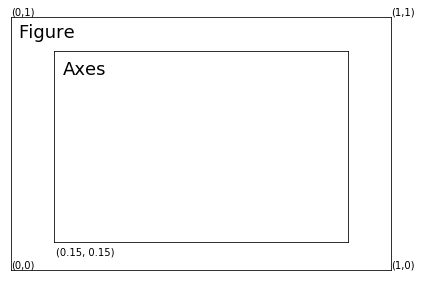

In [0]:
fig = plt.figure()

ax = fig.add_axes([0.05, 0.05, .88, .88])
ax.set_yticks([])
ax.set_xticks([])
ax.text(0.001, 0.01, "(0,0)")
ax.text(1.001, 0.01, "(1,0)")
ax.text(0.001, 1.01, "(0,1)")
ax.text(1.001, 1.01, "(1,1)")
ax.text(0.02, 0.92, "Figure", fontsize=18)

ax.text(0.12, 0.06, "(0.15, 0.15)")

ax = fig.add_axes([0.15, 0.15, 0.68, 0.66])
ax.text(0.03, 0.88, "Axes", fontsize=18)
ax.set_yticks([])
ax.set_xticks([])

#### Несколько Axes на одной Figure

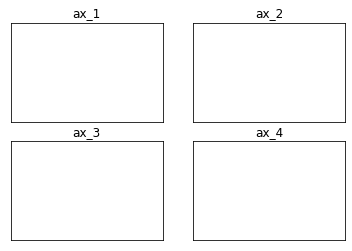

In [0]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()

**Add_subplot()** разбивает Figure на указанное количество строк и столбцов. После такого разбиения Figure можно представить как таблицу (или координатную сетку). Затем область Axes помещается в указанную ячейку. Для всего этого add_subplot() необходимо всего три числа в качестве параметров:

первое - количество строк;

второе - количество столбцов;

третье - индекс ячейки.

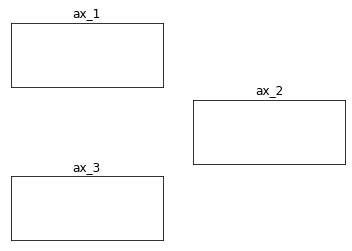

In [0]:

fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 4)
ax_3 = fig.add_subplot(3, 2, 5)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])

plt.show()

[None, None, None, None, None]

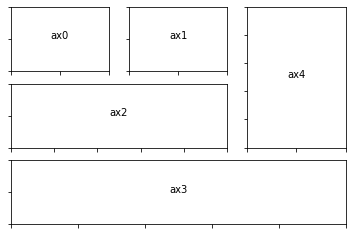

In [0]:
fig = plt.figure()

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

axes = [ax0, ax1, ax2, ax3, ax4]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

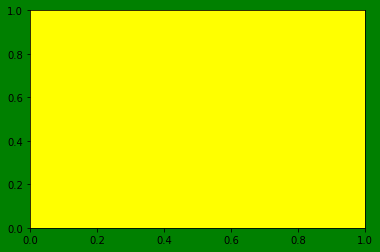

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')
ax.set(facecolor = 'yellow')

plt.show()

Список текущих областей рисования:  []
Тип объекта Figure: <class 'matplotlib.figure.Figure'>


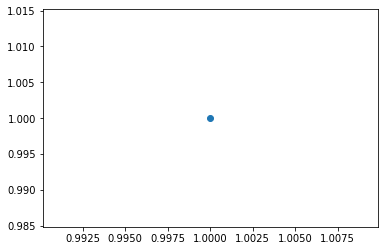

In [0]:
# Пример 1

fig = plt.figure()   # Создание объекта Figure
print ('Список текущих областей рисования: ', fig.axes)   # Список текущих областей рисования пуст
print ('Тип объекта Figure:', type(fig))   # Тип объекта Figure
plt.scatter(1.0, 1.0)   # scatter - метод для нанесения маркера в точке (1.0, 1.0)

# После нанесения графического элемента в виде маркера
# список текущих областей состоит из одной области
print (fig.axes)

plt.show()

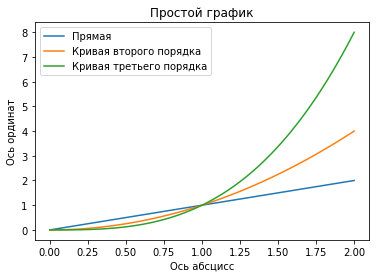

In [0]:
# Пример 2

import numpy as np

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='Прямая')
plt.plot(x, x**2, label='Кривая второго порядка')
plt.plot(x, x**3, label='Кривая третьего порядка')

plt.xlabel('Ось абсцисс')
plt.ylabel('Ось ординат')

plt.title("Простой график")

plt.legend()

plt.show()

Обычно рисунок в matplotlib представляет собой прямоугольную область, заданную в относительных координатах: от 0 до 1 включительно по обеим осям. Второй распространённый вариант типа рисунка - круглая область (polar plot).

Чтобы сохранить получившийся рисунок нужно воспользоваться методом `plt.savefig()`. Он сохраняет текущую конфигурацию текущего рисунка в графический файл с некоторым расширением (png, jpeg, pdf и др.), который можно задать через параметр fmt. Поэтому её нужно вызывать в конце исходного кода, после всех вызова всех других команд. Если в python-скрипте создать несколько рисунков figure и попытаться сохранить их одной командой `plt.savefig()`, то будет сохранён последний рисунок figure.

<class 'matplotlib.axes._axes.Axes'>


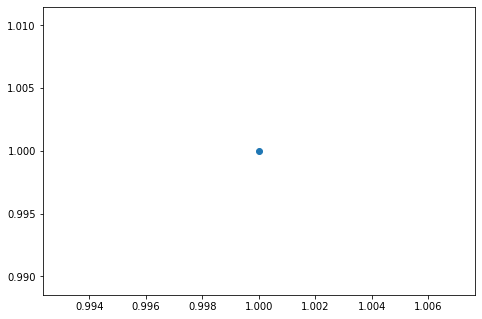

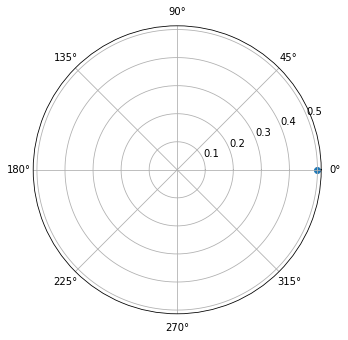

In [0]:
fig = plt.figure()
# Добавление на рисунок прямоугольной (по умолчанию) области рисования
ax = fig.add_axes([0, 0, 1, 1])
print (type(ax))
plt.scatter(1.0, 1.0)
plt.savefig('fig1.png', fmt='png')


fig = plt.figure()
# Добавление на рисунок круговой области рисования
ax = fig.add_axes([0, 0, 1, 1], polar=True)
plt.scatter(0.0, 0.5)
plt.savefig('fig2.pdf', fmt='pdf')

plt.show()

### 1.5 Элементы рисунка Artists

Всё пространство рисунка Figure (прямоугольной или иной формы) можно использовать для нанесения других элементов рисунка, например, контейнеров Axes, графических примитивов в виде линий, фигур, текста и так далее. В любом случае каждый рисунок можно структурно представить следующим образом:

1. Область рисования Axes
    + Заголовок области рисования -> `plt.title()`;

2. Ось абсцисс Xaxis 
    + Подпись оси абсцисс OX -> `plt.xlabel()`;

3. Ось абсцисс Yaxis 
    + Подпись оси абсцисс OY -> `plt.ylabel()`;

4. Легенда -> `plt.legend()`

5. Цветовая шкала -> `plt.colorbar()`
    + Подпись горизонтальной оси абсцисс OY -> `cbar.ax.set_xlabel()`;
    
    + Подпись вертикальной оси абсцисс OY -> `cbar.ax.set_ylabel()`;

7. Деления на оси абсцисс OX -> `plt.xticks()`

8. Деления на оси ординат OY -> `plt.yticks()`

Для каждого из перечисленных уровней-контейнеров есть возможность нанести заголовок (title) или подпись (label). Подписи к рисунку облегчают понимание того, в каких единицах представлены данные на графике или диаграмме.

Также часто на рисунок наносятся линии вспомогательной сетки (grid). В pyplot она вызывается командой `plt.grid()`. Вспомогательная сетка связана с делениями координатных осей (ticks), которые определяются автоматически исходя из значений выборки. В дальнейшем будет показано как определять положение и задавать значения делений на координатных осях. Стоит сказать, что в matplotlib существуют главные деления (major ticks) и вспомогательные (minor ticks) для каждой координатной оси. По умолчанию рисуются только главные делений и связанные с ними линии сетки grid. В плане настройки главные деления ничем не отличаются от вспомогательных.

Если на рисунке присутствует так называемый "mappable object", то на рисунке может быть нарисована цветовая шкала (colorbar). К шкале также можно делать подписи вдоль разных сторон. При этом сама цветовая может быть расположена как на текущей области рисования axes, отбирая у неё некоторую долю, либо может быть размещена на самостоятельной области рисования.

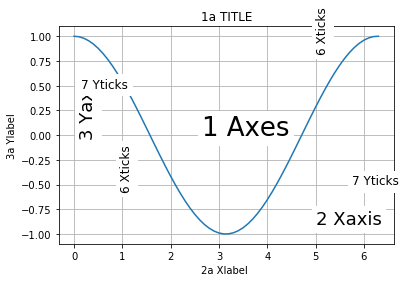

In [0]:
# Элементы простого рисунка 

lag = 0.1
x = np.arange(0.0, 2*np.pi+lag, lag)
y = np.cos(x)

fig = plt.figure()
plt.plot(x, y)

plt.text(np.pi-0.5, 0,  '1 Axes', fontsize=26, bbox=dict(color='w'))
plt.text(0.1, 0, '3 Yaxis', fontsize=18, bbox=dict(color='w'), rotation=90)
plt.text(5, -0.9, '2 Xaxis', fontsize=18, bbox=dict(color='w'))

plt.title('1a TITLE')
plt.ylabel('3a Ylabel')
plt.xlabel('2a Xlabel ')

plt.text(5, 0.85, '6 Xticks', fontsize=12, bbox=dict(color='w'), rotation=90)
plt.text(0.95, -0.55, '6 Xticks', fontsize=12, bbox=dict(color='w'), rotation=90)

plt.text(5.75, -0.5, '7 Yticks', fontsize=12, bbox=dict(color='w'))
plt.text(0.15, 0.475, '7 Yticks', fontsize=12, bbox=dict(color='w'))

plt.grid(True)

plt.show()

### 1.6 Свойства графических элементов
 
Многообразие и удобство создания графики в matplotlib обеспечивается не только за счёт созданных графических команд, но и за счёт богатого арсенала по конфигурации типовых форм. Эта настройка включает в себя работу с цветом, формой, типом линии или маркера, толщиной линий, степенью прозрачности элементов, размером и типом шрифта и другими свойствами.

Параметры, которые определяют эти свойства в различных графических командах, обычно имеют одинаковый синтаксис, то есть называются одинаково. Стандартным способом задания свойств какого либо создаваемого объекта (или методу) является передача по ключу: ключ=значение. Наиболее часто встречаемые названия параметров изменения свойств графических объектов перечислены ниже:

+ *color/colors/c* - цвет;

+ *linewidth/linewidths* - толщина линии;

+ *linestyle* - тип линии;

+ *alpha* - степень прозрачности (от полностью прозрачного 0 до непрозрачного 1);

+ *fontsize* - размер шрифта;

+ *marker* - тип маркера;

+ *s* - размер маркера в методе plt.scatter(только цифры);

+ *rotation* - поворот строки на X градусов.

При создании функций или методов классов, особенно в случае наследования (см. Приложение 1), параметры часто передают в виде объединений последовательностей: кортежа или словаря. Для этого существуют специальные символы-приставки: "\*" или "\**" соответственно. Это особенно полезно в случаях, когда функция/метод может принимать переменное число параметров.

Принято, что для передачи кортежа используется переменная **args**, а в случае со словарём - **kwargs**. Если перед переменной args указан символ "\*", то все дополнительные аргументы, переданные функции/методу, сохранятся в
args в виде кортежа. Если перед args будет указан символ "\**", то все дополнительные параметры будут рассматриваться как пары "ключ - значение" в словаре.

В функциях/методах описывающие свойства таких графических объектов как линия, текст, прямоугольник, параметры часто объединяют в виде последовательностей \*args, либо словарей \*\*kwargs. Так удобнее при создании классов и их методов (смотри пример 1.6.1). 

Если в описании графического метода указано примерно так, как в,

> plt.plot(\*args, \*\*kwargs)

то это значит, что в качестве входных данных требуется сначала список/кортеж параметров(чаще всего нужна хотя бы одна последовательность типа значений функции Y), а после этого можно передавать значения параметров по ключевым именам этих параметров (color, linewidth и т.д.).

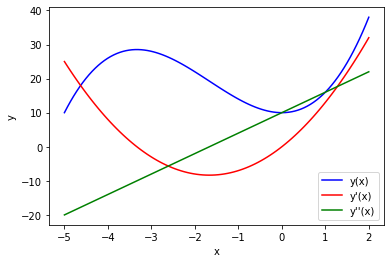

In [0]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

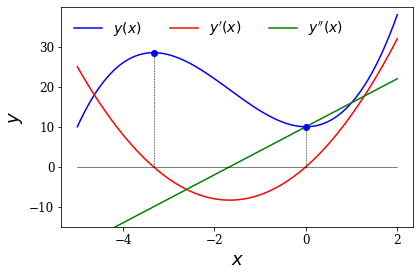

In [0]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

fig, ax = plt.subplots()

# Графики 
ax.plot(x, y1, lw=1.5, color="blue", label=r"$y(x)$")
ax.plot(x, y2, lw=1.5, color="red", label=r"$y'(x)$")
ax.plot(x, y3, lw=1.5, color="green", label=r"$y''(x)$")

ax.plot(x, np.zeros_like(x), lw=0.5, color="black")
ax.plot([-3.33, -3.33], [0, (-3.3)**3 + 5*(-3.3)**2 + 10], ls='--', lw=0.5, color="black")
ax.plot([0, 0], [0, 10], lw=0.5, ls='--', color="black")
ax.plot([0], [10], lw=0.5, marker='o', color="blue") # Точка 
ax.plot([-3.33], [(-3.3)**3 + 5*(-3.3)**2 + 10], lw=0.5, marker='o', color="blue") # Точка 

ax.set_ylim(-15, 40)
ax.set_yticks([-10, 0, 10, 20, 30])
ax.set_xticks([-4, -2, 0, 2])

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.legend(loc=0, ncol=3, fontsize=14, frameon=False)

fig.tight_layout();

Text(0, 0.5, 'y')

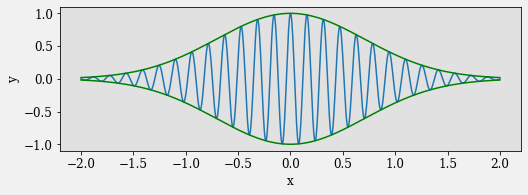

In [0]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")

# координаты осей как доли ширины и высоты холста
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'green')
ax.plot(x, -y2, 'green')
ax.set_xlabel("x")
ax.set_ylabel("y")

## Основные графические команды

Графические команды - это функции, которые, принимая некоторые параметры, возвращают какой-то графический результат. Это может быть текст, линия, график, диаграмма и др. В этой главе будут рассмотрены графические команды, которые создают графику высокого уровня: графики или диаграммы. Подробнее о конкретных типах графиков смотри в электронных ресурсах.

### Электронные ресурсы:

+ [Галерея примеров различной графики в matplotlib](http://matplotlib.org/gallery.html);

+ [Примеры создания геометрических фигур и форм](http://matplotlib.org/examples/shapes_and_collections/artist_reference.html).

+ [Полный список команд для pyplot](http://matplotlib.org/api/pyplot_summary.html)

В Matplotlib заложены как простые графические команды, так и достаточно сложные. Доступ к ним через pyplot означает использование синтаксиса вида "`plt.название_команды()`".

Наиболее распространённые команды для создания научной графики в matplotlib это:

**I. Самые простые графические команды:**

+ `plt.scatter()` - маркер или точечное рисование;

+ `plt.plot()` - ломаная линия;

+ `plt.text()` - нанесение текста;

**II. Диаграммы:**

+ `plt.bar()`, `plt.barh()`, `plt.barbs()`, `broken_barh()` - столбчатая диаграмма;

+ `plt.hist()`, `plt.hist2d()`, `plt.hlines` - гистограмма;

+ `plt.pie()` - круговая диаграмма;

+ `plt.boxplot()` - "ящик с усами" (boxwhisker);

+ `plt.errorbar()` - оценка погрешности, "усы".

**III. Изображения в изолиниях:**

+ `plt.contour()`	- изолинии;

+ `plt.contourf()` - изолинии с послойной окраской;

**IV. Отображения:**

+ `plt.pcolor()`, `plt.pcolormesh()` - псевдоцветное изображение матрицы (2D массива);

+ `plt.imshow()` - вставка графики (пиксели + сглаживание);

+ `plt.matshow()` - отображение данных в виде квадратов.

**V. Заливка:**

+ `plt.fill()` - заливка многоугольника;

+ `plt.fill_between()`, `plt.fill_betweenx()` - заливка между двумя линиями;

**VI. Векторные диаграммы:**

+ `plt.streamplot()` - линии тока;

+ `plt.quiver()` - векторное поле.

[Полный список команд](http://matplotlib.org/api/pyplot_summary.html), доступный для pyplot, можно узнать на официальном сайте matplotlib. В списке нет команд для рисования различных геометрических фигур (круги, многоугольники и т.д.). Это связано с тем, что в matplotlib они вызываются через **matplotlib.patches**, который за них отвечает. Создание геометрически сложных фигур является достаточно специальной задачей, поэтому **matplotlib.patches** здесь не будут рассматриваться. 

Ознакомиться с примерами создания фигур с помощью matplotlib можно в электронных ресурсах к этой главе.

Ниже показаны примеры графики, которую matplotlib создаёт "по умолчанию" при вызове той или иной графической команды. В дальнейшем будет показано как задать ту или иную конфигурацию конкретного графика и как настроить сопутствующие рисунку элементы (подписи, линии вспомогательной сетки, шрифты и т.д.).

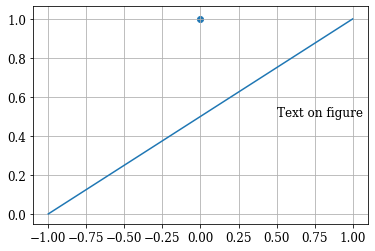

In [0]:
fig = plt.figure()
# Добавление на рисунок прямоугольной (по умолчанию) области рисования
plt.scatter(0.0, 1.0)
plt.plot([-1.0, 1.0], [0.0, 1.0])
plt.text(0.5, 0.5, 'Text on figure')
plt.grid(True)   # линии вспомогательной сетки
plt.show()

### Типы графиков

In [0]:
# Зададим параметры для поседующих графиков
fignum = 0

def hide_labels(fig, ax):
    global fignum
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.axis('tight')

In [0]:
x = np.linspace(-3, 3, 25)
y1 = x**3+ 3 * x**2 + 10
y2 = -1.5 * x**3 + 10*x**2 - 15

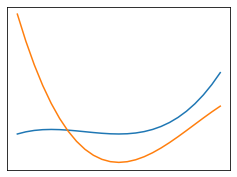

In [0]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(x, y1)
ax.plot(x, y2)

hide_labels(fig, ax)

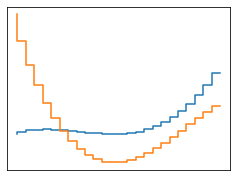

In [0]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.step(x, y1) # Ступенчатый график
ax.step(x, y2) # Ступенчатый график

hide_labels(fig, ax)

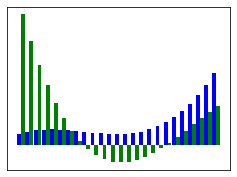

In [0]:
fig, ax = plt.subplots(figsize=(4, 3))
width = 6/50.0
ax.bar(x - width/2, y1, width=width, color="blue") # Закрашенная область между линиями
ax.bar(x + width/2, y2, width=width, color="green") # Закрашенная область между линиями

hide_labels(fig, ax)

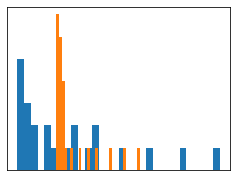

In [0]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.hist(y2, bins=30) # Гистограмма 
ax.hist(y1, bins=30) # Гистограмма 

hide_labels(fig, ax)

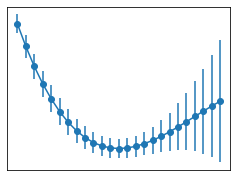

In [0]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.errorbar(x, y2, yerr=y1, fmt='o-') #  Локальная ошибка

hide_labels(fig, ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


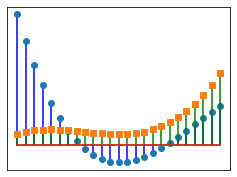

In [0]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.stem(x, y2, 'blue', markerfmt='o') # дискретный график в виде вертикальных линий
ax.stem(x, y1, 'green', markerfmt='s') # дискретный график в виде вертикальных линий

hide_labels(fig, ax)

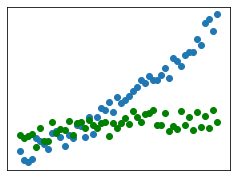

In [0]:
fig, ax = plt.subplots(figsize=(4, 3))

x = np.linspace(0, 5, 50)

ax.scatter(x, -1 + x + 0.25 * x**2 + 2 * np.random.rand(len(x)))
ax.scatter(x, np.sqrt(x) + 2 * np.random.rand(len(x)), color="green")

hide_labels(fig, ax)

## [Подписи к графику](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.annotate.html)

Text(2, 0.1, 'Уравнение: $i\\hbar\\partial_t \\Psi = \\hat{H}\\Psi$')

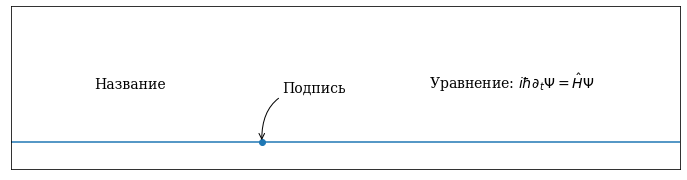

In [0]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

ax.text(0, 0.1, "Название", fontsize=14, family="serif")

ax.plot(1, 0, 'o')
ax.annotate("Подпись",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

ax.text(2, 0.1, r"Уравнение: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")


### Свойства линий

In [0]:
list(range(1, 12, 2))

[1, 3, 5, 7, 9, 11]

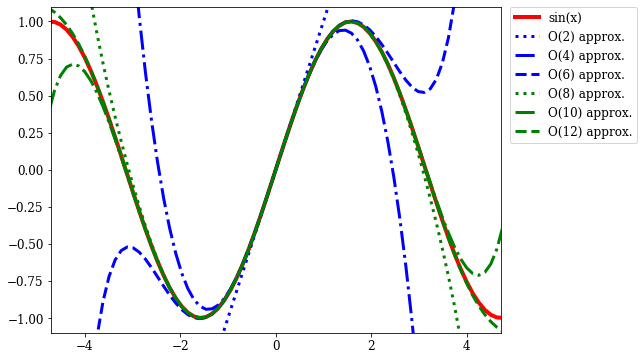

In [0]:
import sympy as s

# символьная переменная для x и числовой массив с конкретными значениями x
sym_x = s.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n): # Вычисление значения функции разложением в ряд Тейлора: sin(x)
    return s.lambdify(sym_x, s.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, np.sin(x), linewidth=4, color="red", label='sin(x)')

colors = ["blue", "green", "red"]
linestyles = [':', '-.', '--'] # Типы линий
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="O(%d) approx." % (n+1))
    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
fig.subplots_adjust(right=.75);

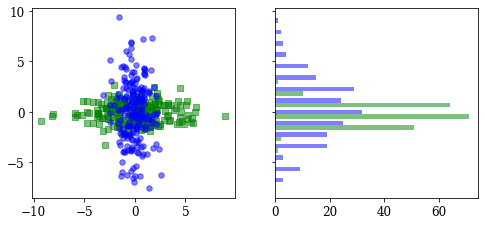

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)

data1 = np.random.randn(200, 2) * np.array([3, 1])
area1 = (np.random.randn(200) + 0.5) * 100

data2 = np.random.randn(200, 2) * np.array([1, 3])
area2 = (np.random.randn(200) + 0.5) * 100

axes[0].scatter(data1[:,0], data1[:,1], color="green", marker="s", s=30, alpha=0.5)
axes[0].scatter(data2[:,0], data2[:,1], color="blue", marker="o", s=30, alpha=0.5)

axes[1].hist([data1[:,1], data2[:,1]], bins=15, color=["green", "blue"], alpha=0.5, orientation='horizontal');

### Легенда 

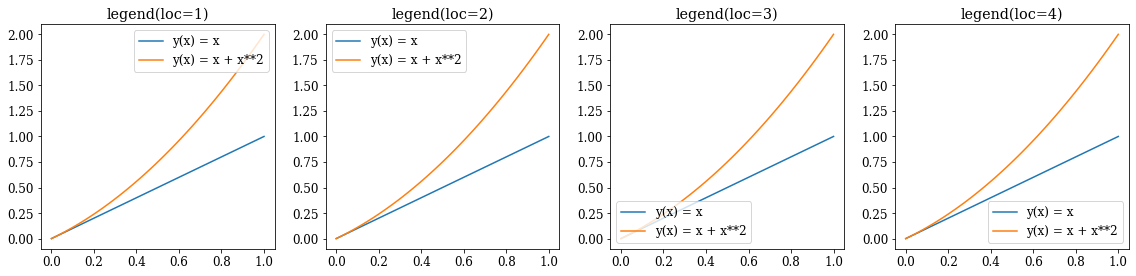

In [0]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

x = np.linspace(0, 1, 100)

for n in range(4):
    axes[n].plot(x, x, label="y(x) = x")
    axes[n].plot(x, x + x**2, label="y(x) = x + x**2")
    axes[n].legend(loc=n+1)
    axes[n].set_title("legend(loc=%d)" % (n+1))
    
fig.tight_layout() # Масштабируем, чтобы подзаголовок вписывался в область рисунка

### Подбор диапазона значений осей

Text(0.5, 1.0, "axis('equal')")

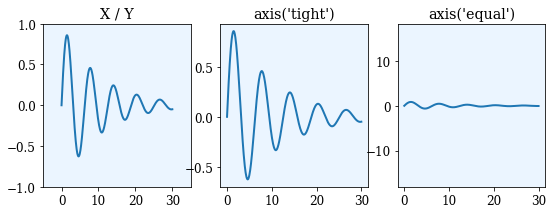

In [0]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("X / Y")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

### Деления

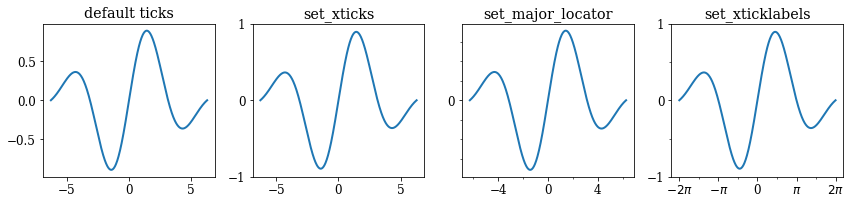

In [0]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])
axes[1].set_title("set_xticks")

axes[2].plot(x, y, lw=2)
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].set_title("set_major_locator")

axes[3].plot(x, y, lw=2)
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
axes[3].xaxis.set_minor_locator(mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2]))
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))
axes[3].set_title("set_xticklabels")

fig.tight_layout()

### Сетка

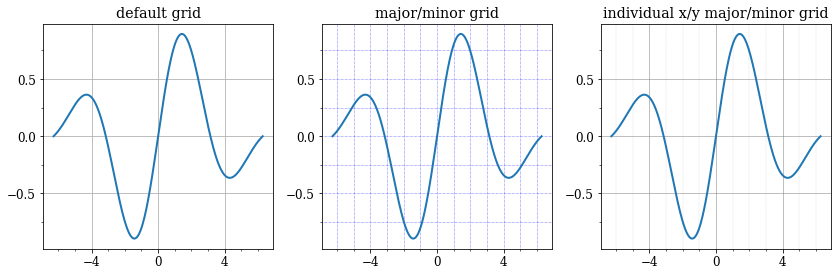

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

fig.tight_layout()

### Форматирование подписей к осям

По осям в большинстве случаев откладываются какие-либо числовые данные. 

**FormatStrFormatter** - класс для удобного выбора числового формата надписей (количество знакомест, количество значащих нулей, возможность использования экспоненциальной формы записи чисел и т.п.). 

В качестве единственного параметра его конструктор принимает строку форматирования.

Класс **ScalarFormatter** используется для простого вывода чисел. При этом у него есть несколько настроек, позволяющих сделать отображение больших чисел чуть более компактным. Именно этот форматер используется для отображения чисел по умолчанию (если не установлен никакой другой форматер).

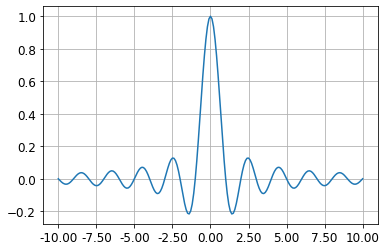

In [0]:
import matplotlib
x = np.arange (-10.0, 10.1, 0.1)
y = np.sinc (x)

plt.rc('font',**{'family':'verdana'})
figure = plt.figure()
axes = figure.add_subplot (1, 1, 1)

# Создаем форматер
formatter = matplotlib.ticker.FormatStrFormatter ("%.2f")

# Установка форматера для оси X
axes.xaxis.set_major_formatter (formatter)

plt.plot (x, y)

axes.grid()

findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


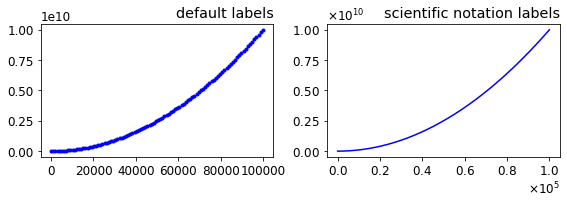

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)
y = x ** 2

axes[0].plot(x, y, 'b.')
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

fig.tight_layout()

### Двойные оси

findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


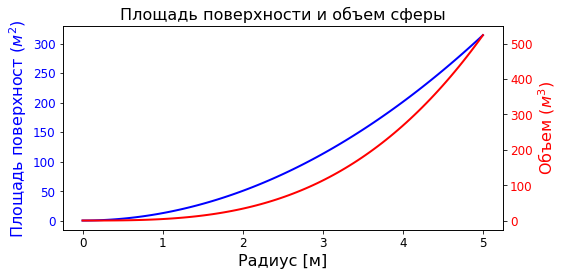

In [0]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2  # area
v = (4 * np.pi / 3) * r ** 3  # volume


ax1.set_title("Площадь поверхности и объем сферы", fontsize=16)
ax1.set_xlabel("Радиус [м]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"Площадь поверхност ($м^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"Объем ($м^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
fig.tight_layout()

### Дополнительные возможности (вставка графика)

findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


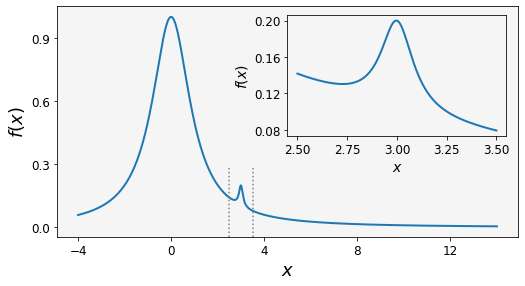

In [0]:
fig = plt.figure(figsize=(8, 4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# Основной график
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# Вставка
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

### Задание

Провести визуальный анализ данных:

1)	Выбрать любой набор данных (в формате csv/txt), открытый для скачивания в сети Интернет (при необходимости преобразовать в формат csv).

2)	Построить не менее 3 графиков (столбчатый, гистограмма, …) по различным характеристикам.

Например:

Набор данных1: [ОБЪЕКТЫ И ОБРАЗОВАТЕЛЬНЫЕ ДАННЫЕ ДЛЯ ГОСУДАРСТВЕННЫХ ШКОЛ БОСТОНА](https://data.boston.gov/dataset/buildbps-facilities-and-educational-data-for-boston-public-schools)

Набор данных2: [СВЕДЕНИЯ О ЧИСЛЕ ЗАРЕГИСТРИРОВАННЫХ  РОДИВШИХСЯ, УМЕРШИХ, БРАКОВ И РАЗВОДО](https://www.gks.ru/free_doc/2018/demo/edn12-18.htm )
- Статистика по областям
- Прирост/убыль населения


Для поиска наборов данных используйте [Google dataset search](https://toolbox.google.com/datasetsearch)



In [0]:
import matplotlib.pyplot as plt
import csv
import random
from collections import Counter

school_types=dict()
with open('buildbps.csv', encoding='ISO-8859-1') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
      if row['SMMA_Typology'] in school_types:
        school_types[row['SMMA_Typology']] += 1
      else:
        school_types[row['SMMA_Typology']] = 1

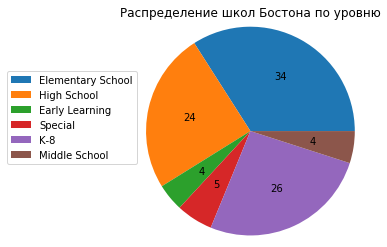

In [0]:
fig = plt.figure()
plt.title('Распределение школ Бостона по уровню')
plt.pie(school_types.values(), autopct='%d', radius=1.2)
plt.legend(
    bbox_to_anchor = (-0.3, 0.5, 0.3, 0.3),
    labels = school_types.keys() )

In [0]:
cities = dict()

with open('buildbps.csv', encoding='ISO-8859-1') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
      if row['BRA_Neighborhood'] in cities.keys():
        cities[row['BRA_Neighborhood']] += 1
      else:
        cities[row['BRA_Neighborhood']] = 1

(0, 30)

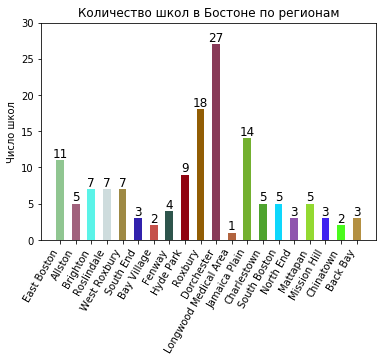

In [0]:

c=[(random.random(),random.random(),random.random()) for i in cities.keys()]
plt.bar(cities.keys(), cities.values(), color=c, width=.5)
for i, val in enumerate(cities.values()):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(cities.keys(), rotation=60, horizontalalignment= 'right')
plt.title("Количество школ в Бостоне по регионам")
plt.ylabel('Число школ')
plt.ylim(0, 30)

In [0]:
years = list()

with open('buildbps.csv', encoding='ISO-8859-1') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
      if row['BPS_Year_Built']:
        years.append(int(row['BPS_Year_Built']))
years.sort()
c = Counter(years)
_years = list()
for i in c:
  if len(_years) == 0:
    _years.append(c[i])
  else:
    _years.append(_years[-1] + c[i])
years = list(set(years))
years.sort()

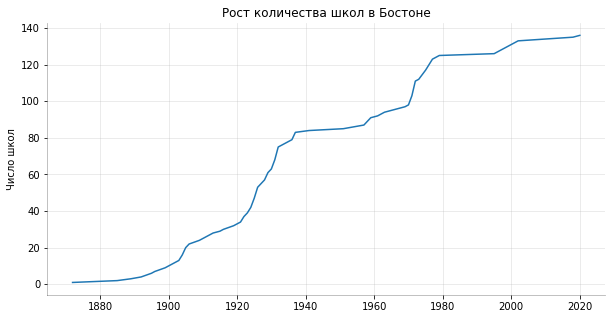

In [0]:
plt.figure(figsize=(10,5))
plt.plot(years, _years)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.title("Рост количества школ в Бостоне")
plt.ylabel('Число школ')
plt.grid(axis='both', alpha=.3)